In [75]:
#!pip freeze > ../requirements.txt
#!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
from wordcloud import WordCloud
from lexicalrichness import LexicalRichness

In [2]:
df = pd.read_csv('./data/clean_lyrics.csv')
df.head()

,title,artist,year,lyric,clean_lyric,decade,unique_words,words
0,João Teimoso,Marília Batista,1953,Tenho mais o que fazer Não discuto com teimoso...,não discuto teimoso não perder precioso viver ...,50,"{'viver', 'começa', 'discuto', 'fome', 'coroas...","['não', 'discuto', 'teimoso', 'não', 'perder',..."
1,Morena Sereia,Marília Batista,1953,Morena sereia Que à beira-mar não passeia Que ...,morena sereia beira mar não passeia senta prai...,50,"{'criança', 'enche', 'lindos', 'castelos', 'no...","['morena', 'sereia', 'beira', 'mar', 'não', 'p..."
2,"Parabéns, Guanabara",Jackson do Pandeiro,1955,"Rio, querida Guanabara Eu sou gente também Ace...",rio querida guanabara gente aceito parabéns pa...,50,"{'tamanho', 'junto', 'bandas', 'seja', 'cantan...","['rio', 'querida', 'guanabara', 'gente', 'acei..."
3,O Bom Xaxador,Jackson do Pandeiro,1955,Depois do baião foi que veio o forró Depois do...,baião veio forró forró veio rojão pisada chão ...,50,"{'vim', 'forró', 'veio', 'rojão', 'pisada', 'c...","['baião', 'veio', 'forró', 'forró', 'veio', 'r..."
4,Cheguei Agora,Jackson do Pandeiro,1955,Beira mar beira do rio Ê ê beira mar Cheguei a...,beira mar beira rio beira mar cheguei beira ma...,50,"{'café', 'bahia', 'bota', 'cacau', 'cocada', '...","['beira', 'mar', 'beira', 'rio', 'beira', 'mar..."


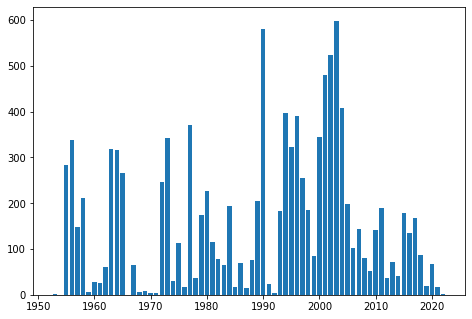

In [3]:
#quantidade de músicas por ano
df_hist = df.groupby(['year'])['title'].count().reset_index().rename(columns={'year': 'year', 'title':'songs'})
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
years = df_hist['year'].to_list()
song_count = df_hist['songs']
ax.bar(years, song_count)
plt.show()

## Análise de Sentimentos

In [4]:
from LeIA.leia import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['polarity_scores'] = df['clean_lyric'].apply(sia.polarity_scores)

In [6]:
label = []
for _, polarity in enumerate(df['polarity_scores']):
    if polarity['compound'] > 0:
        label.append(1)
    elif polarity['compound'] < 0:
        label.append(-1)
    else:
        label.append(0)

In [7]:
df['label'] = label

### Verificando balanceamento das polaridades

/home/mateuslourenco/developer/emotion-mining-and-sentiment-analysis/.nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


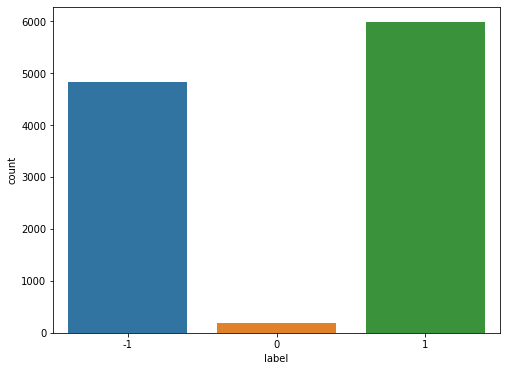

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df['label'])
plt.show()

### Núvem de palavras (BOW) dos termos mais frequentes durante as décadas

In [9]:
vectorizer = CountVectorizer(binary=True, max_features=5000)
lyrics_df = df['clean_lyric']
x_bow = vectorizer.fit_transform(lyrics_df)

In [10]:
vectorizer_df = pd.DataFrame(x_bow.toarray(), columns=vectorizer.get_feature_names_out())

In [11]:
vectorizer_df['decade'] = df['decade']
vect_words = vectorizer_df.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words', 0: '2000', 10:'2010', 
                                                              20:'2020', 50:'1950', 60:'1960', 
                                                              70:'1970', 80:'1980', 90:'1990'})
vect_words = vect_words.rename_axis(columns='')

In [12]:
#vect_words.to_csv('./data/vect_words.csv', index=False)
vect_words = pd.read_csv('./data/vect_words.csv')

In [13]:
def plot_wordcloud(df, row, col):
    wc = WordCloud(background_color="white",
                     max_font_size=100,
                     random_state=15)
    plt.figure(figsize=(20,10))
     
    for index, value in enumerate(df.columns[1:]):
      top_dict = dict(zip(df['words'].tolist(),
                        df[value].tolist()))
      wc.generate_from_frequencies(top_dict)
      plt.subplot(row,col,index+1)
      plt.imshow(wc,interpolation="bilinear")
      plt.axis("off")
      plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

<Figure size 432x288 with 0 Axes>

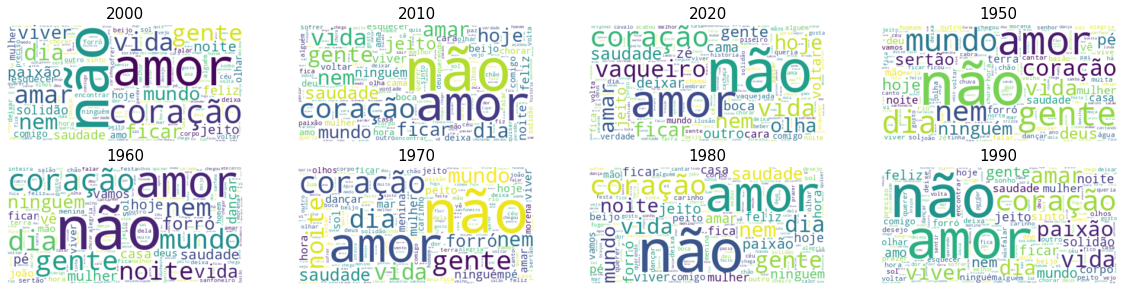

In [14]:
plot_wordcloud(vect_words, 4, 4)

## TF-IDF (Term Frequency - Inverse Document Frequency)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=5000)

x_tfidf = tfidf_vect.fit_transform(lyrics_df)

x_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### BOW vs TF-IDF

In [16]:
from sklearn.model_selection import train_test_split

# dividindo massa entre 70% para treino e 30% para teste
x1_train, x1_test, y1_train, y1_test = train_test_split(x_bow, 
                                                        df['label'],
                                                        test_size=0.3,
                                                        random_state=10)

x2_train, x2_test, y2_train, y2_test = train_test_split(x_tfidf, 
                                                        df['label'],
                                                        test_size=0.3,
                                                        random_state=10)

### Cálculo da Riqueza Léxica

In [26]:
def plot_lexical_richness(df, col, richness_col):
    df_ttr = df.groupby([col])[richness_col].mean().reset_index()
    x1 = df_ttr[col].to_list()
    y1 = df_ttr[richness_col].to_list()
    plt.plot(x1, y1, label = "line 1")

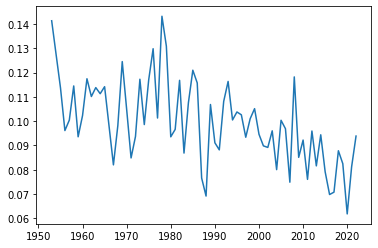

In [27]:
# type-token ratio (TTR) of text - TAXA DO TIPO DE TOKEN.
df['TTR'] = [LexicalRichness((' ').join(lyric)).ttr
 for _, lyric in enumerate(df['words'])]

plot_lexical_richness(df, 'year', 'TTR')

In [30]:
# Using friedman's super smoother from 1984
#!pip install supersmoother
from supersmoother import SuperSmoother, LinearSmoother

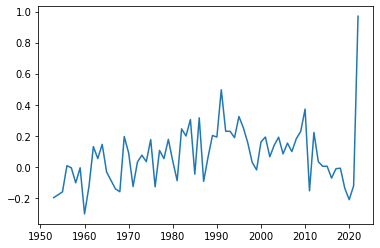

In [31]:
df['score'] = [polarity['compound'] for _, polarity in enumerate(df['polarity_scores'])]
df_sentiment = df.groupby(['year'])['score'].mean().reset_index()

x1 = df_sentiment['year'].to_list()
y1 = df_sentiment['score'].to_list()

plt.plot(x1, y1, label="line 1")
#plt.savefig('./data/sentiment_trend.png', bbox_inches='tight')

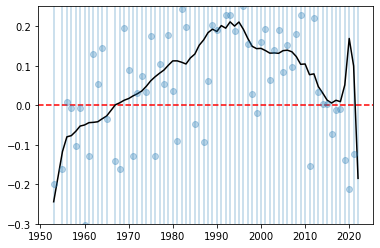

In [36]:
t = df_sentiment['year'].to_list()
y = df_sentiment['score'].to_list()
dy = t

model = SuperSmoother()
model.fit(t, y, dy)

tfit = df_sentiment['year'].to_list()
yfit = model.predict(tfit)

plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(-0.3, 0.25)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k')
#plt.savefig('./data/sentiment_trend_smoothed.png', bbox_inches='tight')

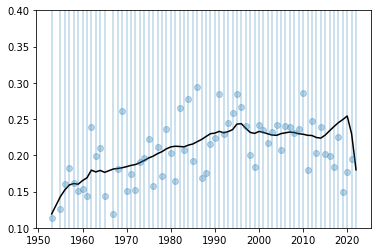

In [37]:
df['score_pos'] = [polarity['pos'] for _, polarity in enumerate(df['polarity_scores'])]

df_sentiment_pos = df.groupby(['year'])['score_pos'].mean().reset_index()

x = df_sentiment_pos['year'].to_list()
y = df_sentiment_pos['score_pos'].to_list()
dy = x

model = SuperSmoother()
model.fit(x, y, dy)

t_fit = df_sentiment_pos['year'].to_list()
yfit = model.predict(t_fit)

plt.errorbar(x, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.1, 0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(t_fit, yfit, '-k')
#plt.savefig('./data/sentiment_trend_pos.png', bbox_inches='tight')


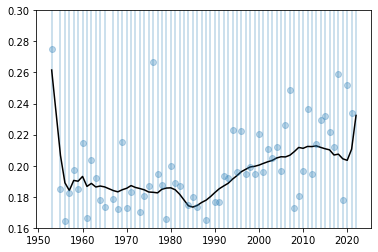

In [43]:
df['score_neg'] = [polarity['neg'] for _, polarity in enumerate(df['polarity_scores'])]

df_sentiment_neg = df.groupby(['year'])['score_neg'].mean().reset_index()

x = df_sentiment_neg['year'].to_list()
y = df_sentiment_neg['score_neg'].to_list()
dy = x

model = SuperSmoother()
model.fit(x, y, dy)

t_fit = df_sentiment_neg['year'].to_list()
yfit = model.predict(t_fit)

plt.errorbar(x, y, dy, fmt='o', alpha=0.3)
plt.ylim(0.16, 0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(t_fit, yfit, '-k')
#plt.savefig('./data/sentiment_trend_neg.png', bbox_inches='tight')

### Comparando resultados

In [44]:
#media
df_sentiment_pos['mean'] = df_sentiment_pos['score_pos'].mean()
#desvio padrao
df_sentiment_pos['std'] = df_sentiment_pos['score_pos'].std()

df_sentiment_pos['z-score_pos'] = (df_sentiment_pos['score_pos'] - df_sentiment_pos['mean'] / df_sentiment_pos['std'])


In [45]:
#media
df_sentiment_neg['mean'] = df_sentiment_neg['score_neg'].mean()
#desvio padrao
df_sentiment_neg['std'] = df_sentiment_neg['score_neg'].std()

df_sentiment_neg['z-score_neg'] = (df_sentiment_neg['score_neg'] - df_sentiment_neg['mean'] / df_sentiment_neg['std'])


In [46]:
#uniao das medidas positivas e negativas
df_sentiment_score = df_sentiment_pos.merge(df_sentiment_neg, on='year')

In [47]:
df_sentiment_score['difference'] = df_sentiment_score['z-score_pos']-df_sentiment_score['z-score_neg']

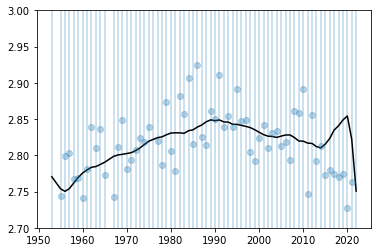

In [53]:
# Using supersmoother
t = df_sentiment_score['year'].to_list()
y = df_sentiment_score['difference'].to_list()
dy = t

# fit the supersmoother model
model = SuperSmoother()
model.fit(t, y, dy)

# find the smoothed fit to the data
tfit = df_sentiment_score['year'].to_list()
yfit = model.predict(tfit)

# Show the smoothed model of the data
plt.errorbar(t, y, dy, fmt='o', alpha=0.3)
plt.ylim(2.7, 3)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(tfit, yfit, '-k')

## Extrator de emoções


In [17]:
"""
Lexicon source is (C) 2016 National Research Council Canada (NRC) 
and library is for research purposes only.  
Source: http://sentiment.nrc.ca/lex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             icons-for-research/
"""
lexicon = pd.read_csv('./data/pt-nrc-lexicon.csv', sep=';', encoding='utf-8')
lexicon.shape

(9921, 4)

In [18]:
lexicon = lexicon[lexicon['pt']!='NO TRANSLATION']
lexicon = lexicon.reset_index().rename(columns={'emotion-intensity-score':'score'})
lexicon = lexicon[['pt', 'emotion', 'score']]

In [40]:
words = lexicon['pt'].to_list()
emotions = lexicon['emotion'].to_list()
scores = lexicon['score'].to_list()

lex = dict(zip(words,zip(emotions, scores)))

In [43]:
lyric = df.loc[10, 'words']

for word in lyric:
    if word in lex.keys():
        print(lex[word])

In [72]:
corpus = []
for i in lemma:
    if i in lex.keys():
        corpus.append({i: lex[i]})

In [73]:
corpus

[{'não': ('trust', 0.273)},
 {'não': ('trust', 0.273)},
 {'perder': ('surprise', 0.383)},
 {'precioso': ('surprise', 0.195)},
 {'viver': ('joy', 0.406)},
 {'pé': ('trust', 0.359)},
 {'rede': ('anticipation', 0.289)},
 {'fome': ('sadness', 0.812)},
 {'sede': ('surprise', 0.172)},
 {'preferir': ('trust', 0.469)},
 {'não': ('trust', 0.273)}]

In [33]:
from enelvo.normaliser import Normaliser

norm = Normaliser()
normalizeds = [norm.normalise(word) for word in vect_words['words']]

In [51]:
import spacy

nlp = spacy.load('pt_core_news_sm')

In [62]:
pre = df.loc[0, 'clean_lyric']
nml = norm.normalise(pre)
doc = nlp(pre)
lemma = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]

In [65]:
print(f'pre: {pre}')
print(f'normalized: {nml}')
print(f'lemma: {(" ").join(lemma)}')

pre: não discuto teimoso não perder precioso viver joão teimoso nome dorme pé rede bebida fome comida sede foge meninas boas prefere coroas começa não pára cara cismo cara
normalized: não discuto teimoso não perder precioso viver joão teimoso nome dorme pé rede bebida fome comida sede foge meninas boas prefere coroas começa não pare cara cismo cara
lemma: não discuto teimoso não perder precioso viver joão teimoso nome dormir pé rede bebido fome comido sede foge meninas boas preferir coroas comedir não parar cara cismo caro


In [66]:
sia.polarity_scores(pre)

{'neg': 0.493, 'neu': 0.425, 'pos': 0.083, 'compound': -0.9246}

In [67]:
sia.polarity_scores(nml)

{'neg': 0.5, 'neu': 0.419, 'pos': 0.081, 'compound': -0.9325}

In [69]:
sia.polarity_scores((" ").join(lemma))

{'neg': 0.445, 'neu': 0.415, 'pos': 0.141, 'compound': -0.8807}